# importing Libraries

In [64]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

In [65]:
df_red=pd.read_csv("E:\Data Trained\Project 5\winequality-red.csv")
df_white=pd.read_csv("E:\Data Trained\Project 5\winequality-white.csv")

In [66]:
df_red["color"] = "R"
df_white["color"] = "W"

In [67]:
df_all=pd.concat([df_red,df_white],axis=0)

In [68]:
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [69]:
df_white.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'citric acid':'citric_acid',
    'volatile acidity':'volatile_acidity',
    'residual sugar':'residual_sugar',
    'free sulfur dioxide':'free_sulfur_dioxide',
    'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [70]:
df_red.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'citric acid':'citric_acid',
    'volatile acidity':'volatile_acidity',
    'residual sugar':'residual_sugar',
    'free sulfur dioxide':'free_sulfur_dioxide',
    'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [71]:
df_all.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'citric acid':'citric_acid',
    'volatile acidity':'volatile_acidity',
    'residual sugar':'residual_sugar',
    'free sulfur dioxide':'free_sulfur_dioxide',
    'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [72]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [73]:
df = pd.get_dummies(df_all, columns=["color"])

#EDA

In [74]:
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [75]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [76]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_R,color_W
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,-0.487218


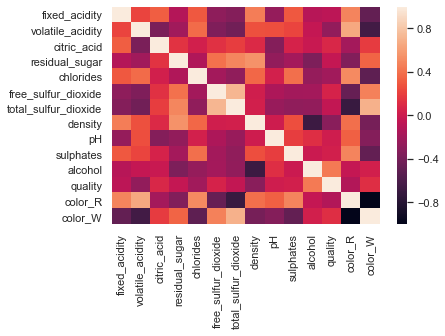

In [77]:
sns.heatmap(df.corr())

In [78]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [79]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


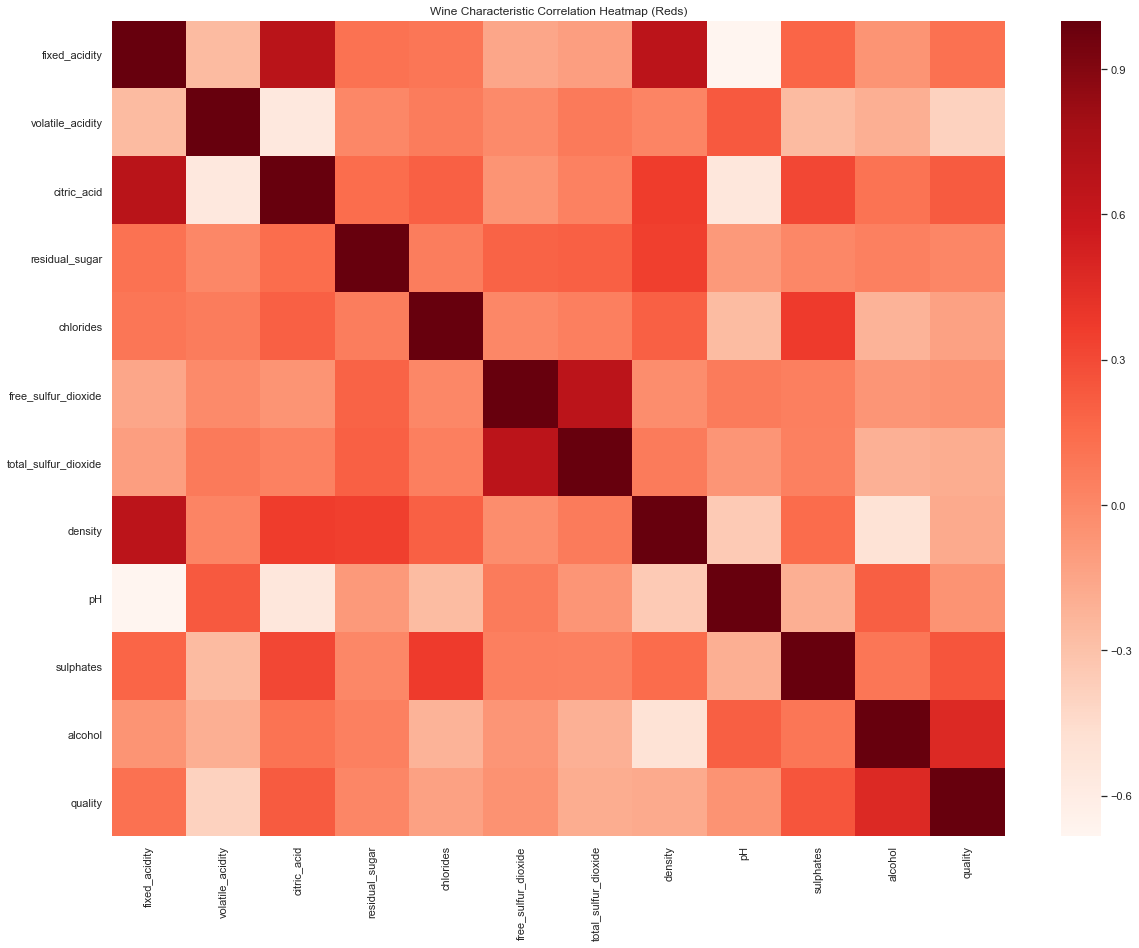

In [85]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

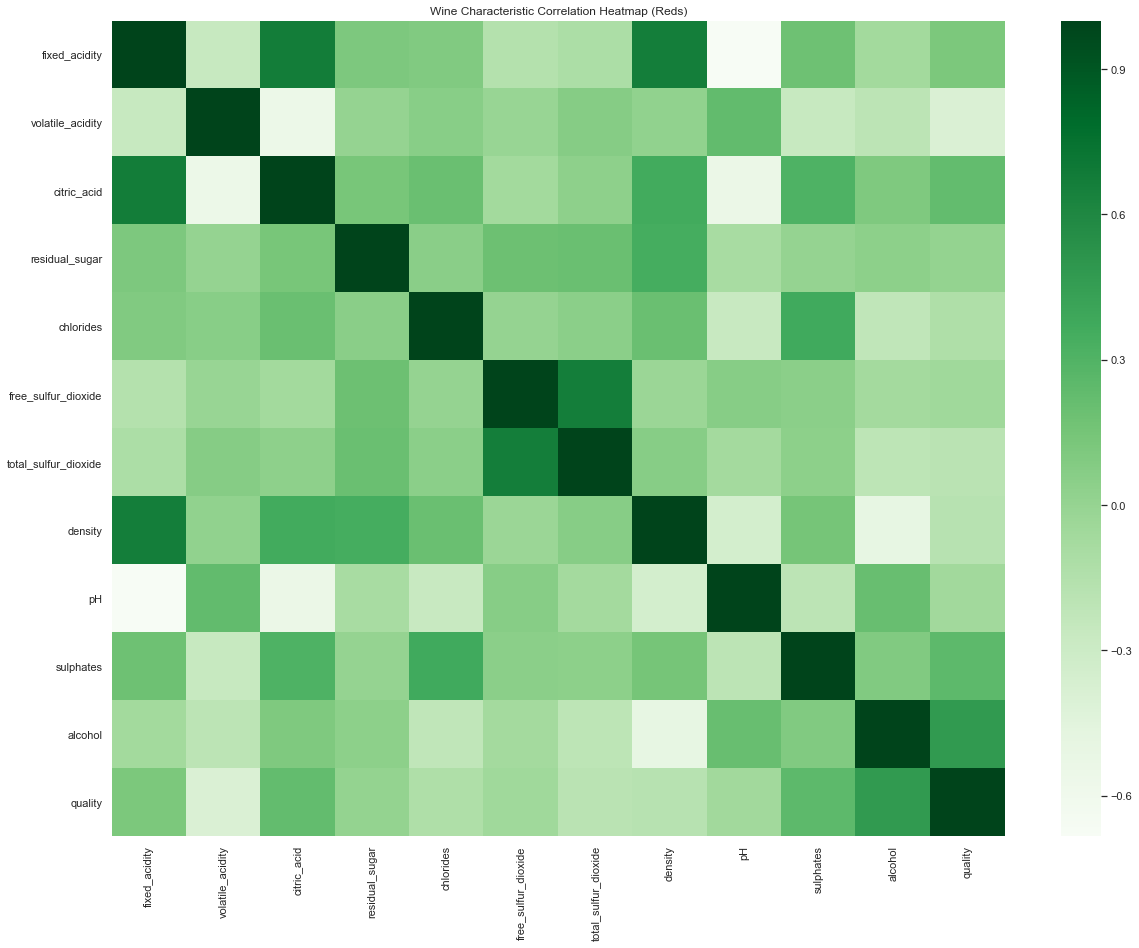

In [83]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Greens")

In [89]:
df_r_corr=df_red.corr()
df_w_corr=df_white.corr()

In [91]:
diff_corr = df_r_corr - df_w_corr

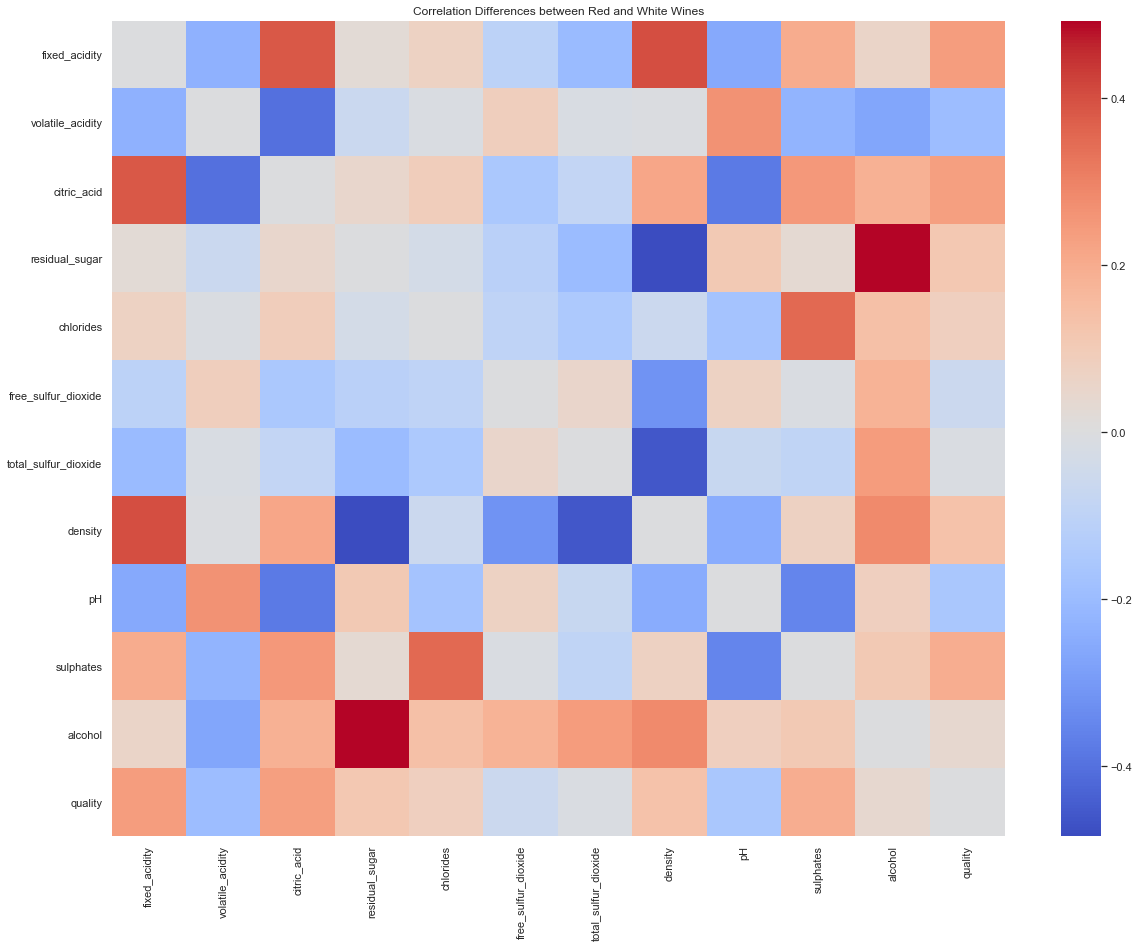

In [92]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

80-20 Split of Training and Hold-Out Data

In [93]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4)

In [94]:
results1 = smf.ols('quality ~ total_sulfur_dioxide + free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density + color_R', data=df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:36:31   Log-Likelihood:                -7198.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6486   BIC:                         1.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.7597 

In [96]:
y=train["quality"]
cols=["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
X=train[cols]

In [97]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
ytrain_pred = regr.predict(X)
print("Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

Mean squared error: 0.54


In [103]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
Xtest=test[cols]

In [104]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.54


In [105]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

60-40 Split of Training and Hold-Out Data

In [106]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(df, test_size=0.4, random_state=4)

In [107]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density","color_R"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
ytrain_pred2 = regr.predict(X2)
print("Mean squared error: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

Mean squared error: 0.53


In [111]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [112]:
ypred2 = regr.predict(Xtest2)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest2, ypred2))

Out-of-sample Mean squared error: 0.55


White Wine Model

In [113]:
w_train, w_test = train_test_split(df_white, test_size=0.2)

In [114]:
results_w = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=df_white).fit()
print(results_w.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:41:16   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [115]:
y_w = w_train["quality"]
cols_w = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
ytrain_predw = regr.predict(X_w)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

In-sample Mean squared error: 0.55


In [118]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestw, ypredw))

Out-of-sample Mean squared error: 0.62


Red Wine Model

In [119]:
r_train, r_test = train_test_split(df_red, test_size=0.2)

In [120]:
results_r = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=df_white).fit()
print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:47:45   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             154.1062    

In [121]:
y_r = r_train["quality"]
cols_r = ["free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
ytrain_predr = regr.predict(X_r)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

In-sample Mean squared error: 0.42


In [124]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Out-of-sample Mean squared error: %.2f"
          % mean_squared_error(ytestr, ypredr))

Out-of-sample Mean squared error: 0.49


In [125]:
#combining both results
y_both = pd.concat([y_w,y_r])

In [126]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)
y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [127]:
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

In-sample Mean squared error: 0.52


In [128]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Out-of-sample Mean squared error: 0.59
